# Principal Component Analysis via Singular Value Decomposition

### Libraries Import

In [165]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from scipy import linalg
import pandas as pd
import numpy as np

### Data Processing

In [166]:
# Running the data generation script
%run data_generation.py

# Loading the dataset
df = pd.read_csv("data.csv")

# Extracting the matrix
X = df.values
N, D = X.shape

Success: data.csv was generated.
Dimensions: 100 samples with 10 features.


### Feature Correlation Heatmap

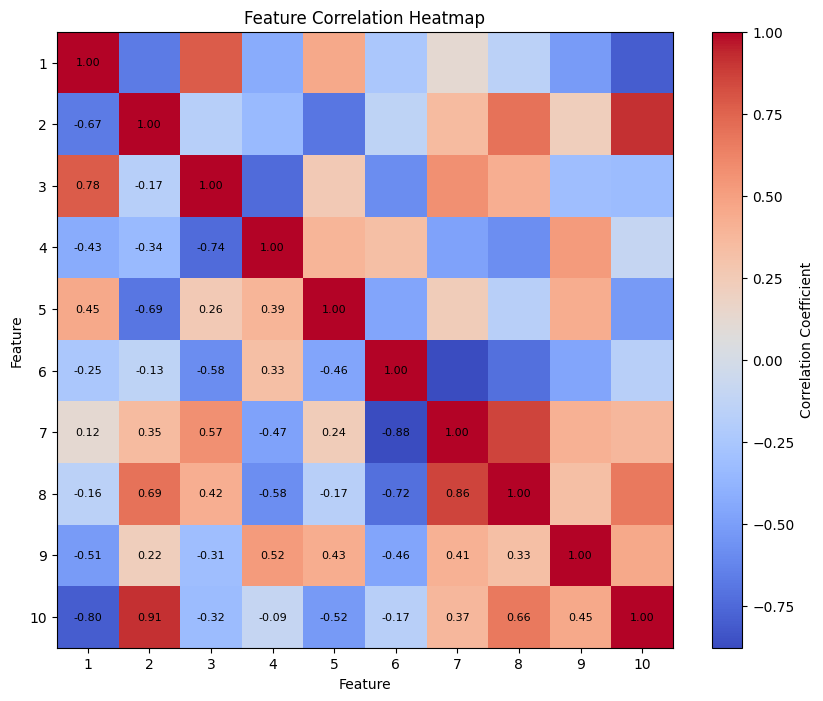

In [167]:
# Calculating the correlation matrix
corr_matrix = df.corr()
D = corr_matrix.shape[0]

# Plotting the heatmap
plt.figure(figsize=(10, 8))
plt.imshow(corr_matrix, cmap="coolwarm", interpolation="nearest")
plt.colorbar(label="Correlation Coefficient")
plt.title("Feature Correlation Heatmap")

# Creating numeric labels
numeric_labels = [i + 1 for i in range(D)]
plt.xticks(range(D), numeric_labels, rotation=0)
plt.yticks(range(D), numeric_labels)
plt.xlabel("Feature")
plt.ylabel("Feature")

# Correlation values for lower triangle
for i in range(D):
    for j in range(D):
        if i >= j:
            text = plt.text(j, i, f"{corr_matrix.iloc[i, j]:.2f}",
                           ha="center", va="center", color="black", fontsize=8)

plt.show()

### Matrix Centering

In [168]:
# Computing the mean vectors for each feature
mu = np.mean(X, axis=0)

# Constructing the centered matrix X_c
X_c = X - mu

print("Centered matrix shape:", X_c.shape)

Centered matrix shape: (100, 10)


### Singular Value Decomposition

In [169]:
# Computing economic SVD
U, S, Vt = linalg.svd(X_c, full_matrices=False)

print("U shape:", U.shape)
print("V^T shape:", Vt.shape)
print("\nSingular Values:")
print(S)

U shape: (100, 10)
V^T shape: (10, 10)

Singular Values:
[377.62464022 315.4681908  266.66156724  38.03502046  34.301084
  31.60230775  30.9120404   27.98667673  25.64565121  24.04400004]


### Eigenvalues Calculation

In [170]:
# Calculating the Eigenvalues
eigenvalues = (S ** 2) / (N - 1)

print("Eigenvalues:")
print(eigenvalues)

Eigenvalues:
[1440.40776669 1005.25433745  718.26658025   14.61275536   11.88448852
   10.08793793    9.65206305    7.91165731    6.64342855    5.83953472]


### Explained Variance Ratio Calculation

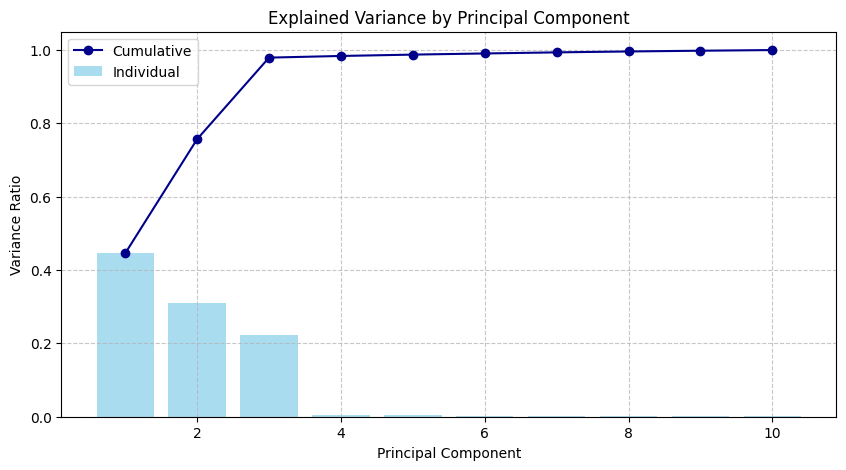

Component 1: 0.4459 cumulative variance
Component 2: 0.7570 cumulative variance
Component 3: 0.9794 cumulative variance
Component 4: 0.9839 cumulative variance
Component 5: 0.9876 cumulative variance
Component 6: 0.9907 cumulative variance
Component 7: 0.9937 cumulative variance
Component 8: 0.9961 cumulative variance
Component 9: 0.9982 cumulative variance
Component 10: 1.0000 cumulative variance


In [171]:
# Calculating explained variance ratio
total_variance = np.sum(eigenvalues)
explained_variance_ratio = eigenvalues / total_variance
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plotting
plt.figure(figsize=(10, 5))
components = range(1, D + 1)

# Bar chart for individual explained variance
plt.bar(components, explained_variance_ratio, label="Individual", alpha=0.7, color="skyblue")

# Line chart for cumulative variance
plt.plot(components, cumulative_variance, marker="o", color="darkblue", label="Cumulative")

plt.title("Explained Variance by Principal Component")
plt.xlabel("Principal Component")
plt.ylabel("Variance Ratio")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

# Print cumulative values
for i, val in enumerate(cumulative_variance):
    print(f"Component {i+1}: {val:.4f} cumulative variance")

### 3D-Subspace Projection

T shape: (100, 3)


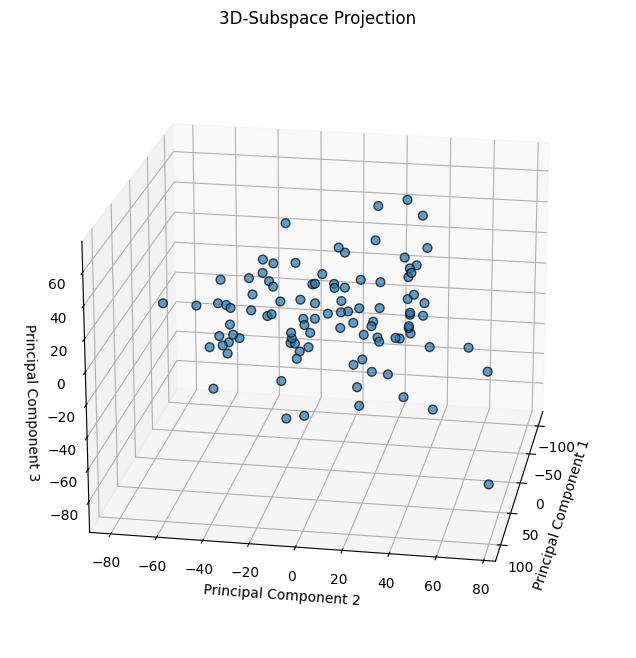

In [ ]:
# Constructing projection matrix W with first 3 principal components
W = V[:, :3]
T = np.dot(X_c, W_k)

print(f"T shape: {T.shape}")

# Visualization of the first 3 Principal Components

fig = plt.figure(figsize=(10, 8))
# Scatterplot in 3D
ax = fig.add_subplot(111, projection="3d")
ax.scatter(T_k[:, 0], T_k[:, 1], T_k[:, 2], s=40, alpha=0.7, edgecolors="k")
ax.set_title(f"3D-Subspace Projection")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.view_init(elev=20, azim=10)

plt.show()